# 라이브러리를 불러옵니다

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

# 한글폰트 사용을 위한 세팅

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 데이터 셋 로드 

In [4]:
import glob 

In [5]:
path = glob.glob('*.csv')
path

['pets_cleansed.csv']

In [6]:
df = pd.read_csv(path[0], encoding = 'utf-8')
df

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5669,프렌치불독,1,0.8,4.0,M,N,흑,260.0,1,0,소,0
5670,프렌치불독,0,0.5,3.5,M,N,검정,227.5,1,0,소,0
5671,프렌치불독,0,0.5,5.2,M,N,"백색, 갈색, 흑색",338.0,1,0,소,0
5672,화이트테리어,13,0.5,7.3,F,Y,흰,474.5,0,1,소,0


# 데이터 살펴보기 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   품종        5674 non-null   object 
 1   나이        5674 non-null   int64  
 2   산책시간(시간)  5674 non-null   float64
 3   체중        5674 non-null   float64
 4   성별        5674 non-null   object 
 5   중성화여부     5674 non-null   object 
 6   색상        5674 non-null   object 
 7   음수량       5674 non-null   float64
 8   성별_라벨링    5674 non-null   int64  
 9   중성화_라벨링   5674 non-null   int64  
 10  크기        5674 non-null   object 
 11  크기_라벨링    5674 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 532.1+ KB


In [8]:
df.describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,1.955939,0.892510,7.444949,483.921678,0.649806,0.087769,0.346493
std,2.603371,0.163133,6.894764,448.159680,0.477073,0.282983,0.610848
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.000000
25%,0.000000,0.800000,2.655000,172.575000,0.000000,0.000000,0.000000
50%,1.000000,0.800000,5.000000,325.000000,1.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,650.000000,1.000000,0.000000,1.000000
max,18.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000


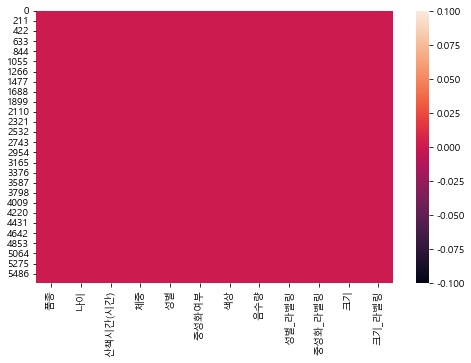

In [9]:
#결측치 시각회
plt.figure(figsize = (8, 5))
sns.heatmap(df.isnull())
plt.show()

# 각 컬럼 별 히스토그램 그려서 데이터 분포 보기 
df.hist(figsize = (12,8))
plt.show()

# 범주형 변수 제외 - 전처리

In [10]:
df.columns

Index(['품종', '나이', '산책시간(시간)', '체중', '성별', '중성화여부', '색상', '음수량', '성별_라벨링',
       '중성화_라벨링', '크기', '크기_라벨링'],
      dtype='object')

In [11]:
#범주형 변수들은 제외하고 새로운 변수로 선언
C1 = df[['나이','산책시간(시간)', '체중', '성별_라벨링',
       '중성화_라벨링','크기_라벨링', '음수량']]

In [12]:
#잘 담겨있는지 확인
C1

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
0,13,0.5,27.0,1,0,2,1755.0
1,10,0.5,25.0,0,0,2,1625.0
2,9,0.5,40.0,1,0,2,2600.0
3,8,0.5,28.0,0,0,2,1820.0
4,8,0.5,33.0,1,0,2,2145.0
...,...,...,...,...,...,...,...
5669,1,0.8,4.0,1,0,0,260.0
5670,0,0.5,3.5,1,0,0,227.5
5671,0,0.5,5.2,1,0,0,338.0
5672,13,0.5,7.3,0,1,0,474.5


# Feature Selection

## 상관분석

In [13]:
C1.corr()

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
나이,1.000000,-0.056727,0.283098,0.097001,0.366550,0.202140,0.283098
산책시간(시간),-0.056727,1.000000,0.537268,0.047376,-0.064798,0.477659,0.537268
체중,0.283098,0.537268,1.000000,0.127471,0.012856,0.916428,1.000000
성별_라벨링,0.097001,0.047376,0.127471,1.000000,0.183315,0.110984,0.127471
중성화_라벨링,0.366550,-0.064798,0.012856,0.183315,1.000000,-0.034216,0.012856
크기_라벨링,0.202140,0.477659,0.916428,0.110984,-0.034216,1.000000,0.916428
음수량,0.283098,0.537268,1.000000,0.127471,0.012856,0.916428,1.000000


<AxesSubplot:>

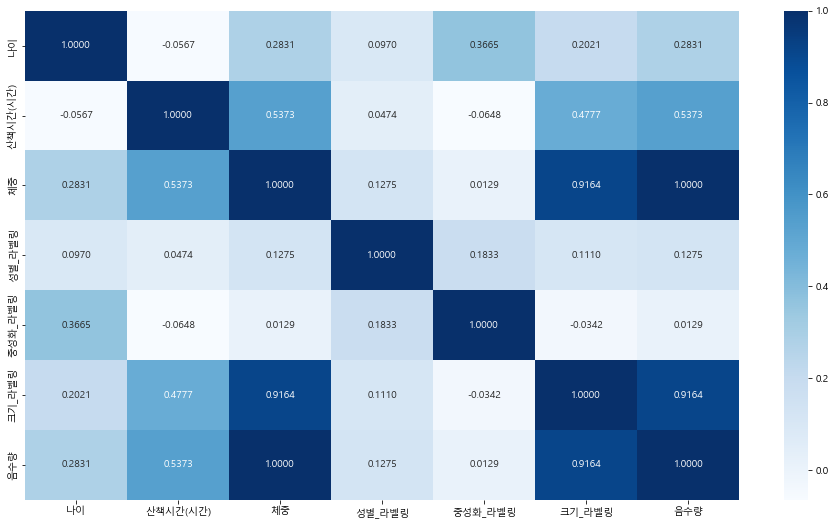

In [14]:
plt.figure(figsize = (16,9))

sns.heatmap(data = C1.corr(),
           cmap = 'Blues', 
           annot = True, fmt = '0.4f')

In [15]:
corr_bar = []

for column in C1.columns:
    print(f"{column}과 크기의 상관관계:{C1[column].corr(C1['크기_라벨링'])}")
    corr_bar.append(C1[column].corr(C1['크기_라벨링']))

나이과 크기의 상관관계:0.2021404585500324
산책시간(시간)과 크기의 상관관계:0.47765942510271586
체중과 크기의 상관관계:0.9164284511703006
성별_라벨링과 크기의 상관관계:0.1109842052361599
중성화_라벨링과 크기의 상관관계:-0.03421605948347803
크기_라벨링과 크기의 상관관계:1.0
음수량과 크기의 상관관계:0.9164284511703032


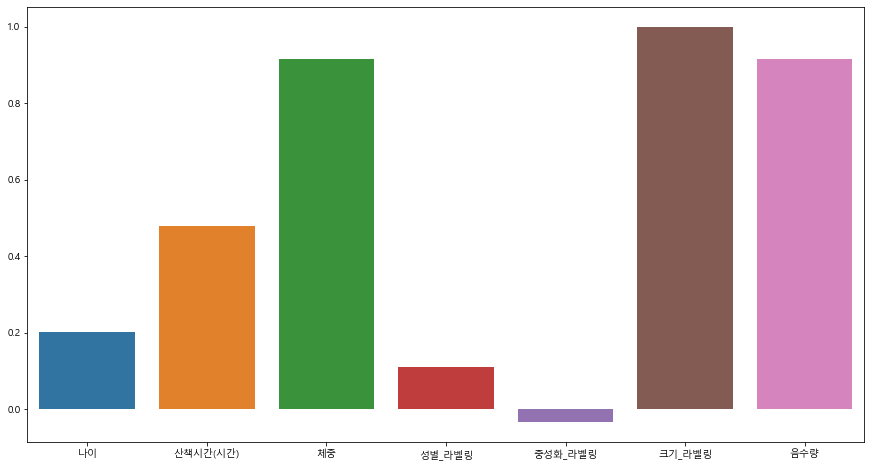

In [16]:
plt.figure(figsize = (15,8))
sns.barplot(C1.columns, corr_bar)
plt.show()

# ElbowPoint

In [17]:
# 군집화 라이브러리 불러오기 .
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [18]:
data = C1

In [19]:
x = [] #k가 몇개인지 -
y = [] #응집도가 몇인지 

# 범위가 1~30인 이유
for k in range (1,30): 
    kmeans = KMeans(n_clusters = k) # 1~ 29개의 군집화 된 객체를 kmeans라고 함   
    kmeans.fit(data)               # kmeans에다가 data2를 학습시킬것임 
    
    x.append(k)
    y.append(kmeans.inertia_)

    
#k가 n개 일 때 응집도는 a라고 이해하면 된다 

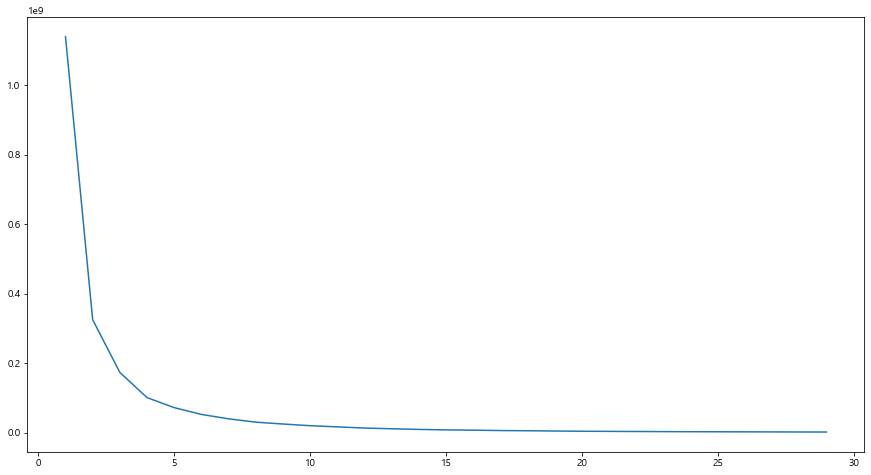

In [20]:
# 그래프 그리기
plt.figure(figsize = (15,8))
plt.plot(x, y)
plt.show()

# 군집화(k=3) With T-SNE

In [21]:
# 3개로 군집화 된 객체를 생성 
kmeans = KMeans(n_clusters = 3)

In [22]:
# 군집화 할 데이터 'data2'를 학습시키기 
kmeans.fit(data)

KMeans(n_clusters=3)

In [23]:
# 학습된 kmeans의 응집도 확인 (각 데이터로부터 자신이 속한 군집의 중심까지의 거리)
# 응집도가 낮을수록 군집화가 더 잘되어있는 것이다

In [24]:
#각 군집 별 중앙 값 
print(kmeans.cluster_centers_[0])
print(kmeans.cluster_centers_[1])
print(kmeans.cluster_centers_[2]) # 얘는 뒤에 e가 붙어서 "*10" 으로 계산해줘야 함 

[ 1.55724580e+00  8.38644249e-01  3.43224713e+00  6.14625033e-01
  9.10061382e-02 -1.60982339e-15  2.23096064e+02]
[3.43392857e+00 1.07357143e+00 2.32806250e+01 7.92857143e-01
 6.96428571e-02 1.74285714e+00 1.51324063e+03]
[2.44330651e+00 9.65983906e-01 1.19567374e+01 6.87637162e-01
 8.63204097e-02 7.24213606e-01 7.77187930e+02]


In [25]:
data

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량
0,13,0.5,27.0,1,0,2,1755.0
1,10,0.5,25.0,0,0,2,1625.0
2,9,0.5,40.0,1,0,2,2600.0
3,8,0.5,28.0,0,0,2,1820.0
4,8,0.5,33.0,1,0,2,2145.0
...,...,...,...,...,...,...,...
5669,1,0.8,4.0,1,0,0,260.0
5670,0,0.5,3.5,1,0,0,227.5
5671,0,0.5,5.2,1,0,0,338.0
5672,13,0.5,7.3,0,1,0,474.5


In [26]:
data['labels'] = kmeans.predict(data)

In [27]:
data.head()

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량,labels
0,13,0.5,27.0,1,0,2,1755.0,1
1,10,0.5,25.0,0,0,2,1625.0,1
2,9,0.5,40.0,1,0,2,2600.0,1
3,8,0.5,28.0,0,0,2,1820.0,1
4,8,0.5,33.0,1,0,2,2145.0,1


In [28]:
data['labels'].value_counts()

0    3747
2    1367
1     560
Name: labels, dtype: int64

In [29]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data)

In [30]:
tsne = TSNE()

In [31]:
data_tsne = pd.DataFrame(data = tsne.fit_transform(scaler_data), columns = ['tsne1', 'tsne2']) 

In [32]:
data_tsne['labels'] = data['labels']

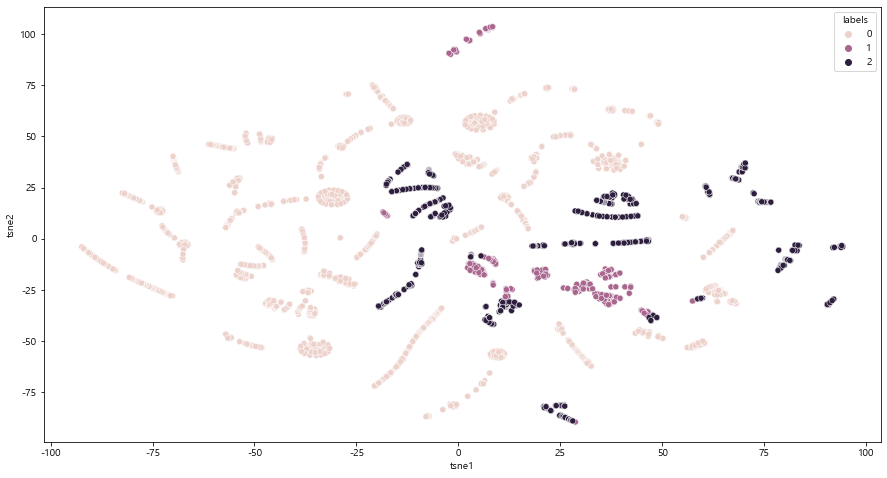

In [33]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'tsne1', y = 'tsne2', hue = 'labels', data = data_tsne)
plt.show()

In [34]:
data_tsne

,tsne1,tsne2,labels
0,45.355553,-35.890629,1
1,46.368355,-35.629772,1
2,44.814499,-34.904652,1
3,46.293774,-35.472393,1
4,44.992878,-35.103775,1
...,...,...,...
5669,8.845449,32.583046,0
5670,55.133671,10.606816,0
5671,54.897369,10.792644,0
5672,63.528511,-30.767103,0


# 결과해석 & 시각화
## (1) 앞에 빼놨던 컬럼 붙이기

In [35]:
data

,나이,산책시간(시간),체중,성별_라벨링,중성화_라벨링,크기_라벨링,음수량,labels
0,13,0.5,27.0,1,0,2,1755.0,1
1,10,0.5,25.0,0,0,2,1625.0,1
2,9,0.5,40.0,1,0,2,2600.0,1
3,8,0.5,28.0,0,0,2,1820.0,1
4,8,0.5,33.0,1,0,2,2145.0,1
...,...,...,...,...,...,...,...,...
5669,1,0.8,4.0,1,0,0,260.0,0
5670,0,0.5,3.5,1,0,0,227.5,0
5671,0,0.5,5.2,1,0,0,338.0,0
5672,13,0.5,7.3,0,1,0,474.5,0


In [36]:
df

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5669,프렌치불독,1,0.8,4.0,M,N,흑,260.0,1,0,소,0
5670,프렌치불독,0,0.5,3.5,M,N,검정,227.5,1,0,소,0
5671,프렌치불독,0,0.5,5.2,M,N,"백색, 갈색, 흑색",338.0,1,0,소,0
5672,화이트테리어,13,0.5,7.3,F,Y,흰,474.5,0,1,소,0


In [37]:
df['labels'] = data['labels']

In [38]:
df.head()

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링,labels
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2,1
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2,1
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2,1
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2,1
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2,1


## (2) 그룹별 갯수 시각화

In [39]:
(df['labels'].value_counts(normalize = True)*100).round(1)

0    66.0
2    24.1
1     9.9
Name: labels, dtype: float64

<AxesSubplot:>

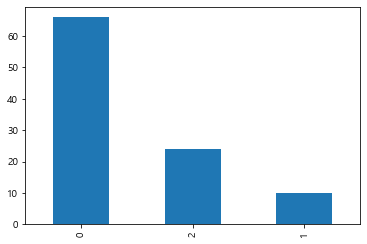

In [40]:
(df['labels'].value_counts(normalize = True)*100).round(1).plot.bar()

## (3) 그룹별 평균 크기 비교

In [42]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
size0 = df[df['labels'] == 0]['크기_라벨링'].mean()
size1 = df[df['labels'] == 1]['크기_라벨링'].mean()
size2 = df[df['labels'] == 2]['크기_라벨링'].mean()

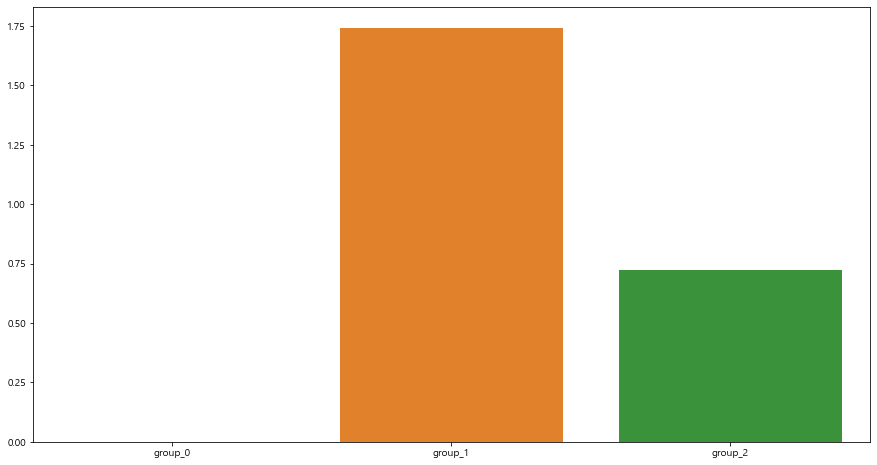

In [43]:
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [size0, size1, size2] )
plt.show()

## (4) 그룹별 평균 나이 비교

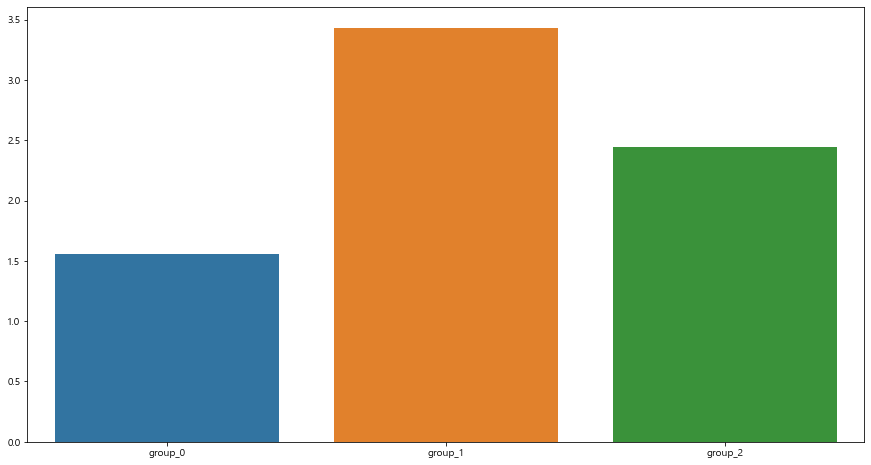

In [44]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
age0 = df[df['labels'] == 0]['나이'].mean()
age1 = df[df['labels'] == 1]['나이'].mean()
age2 = df[df['labels'] == 2]['나이'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [age0, age1, age2] )
plt.show()

## (5) 그룹별 평균 체중비교

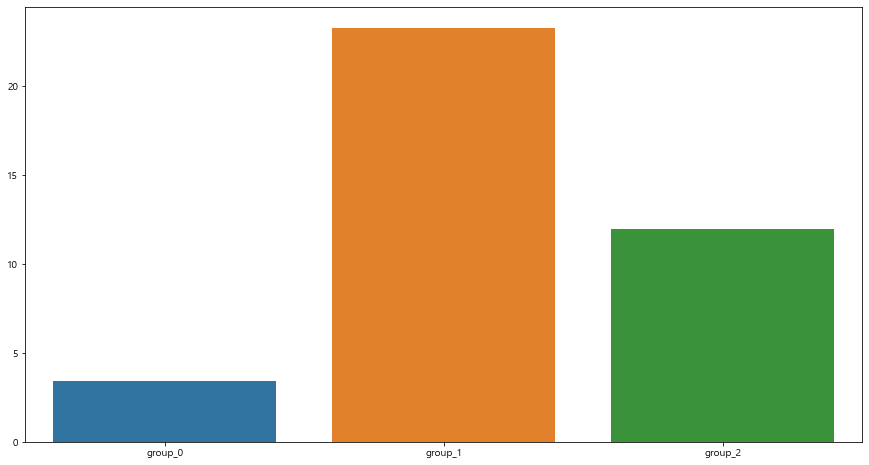

In [45]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
wgt0 = df[df['labels'] == 0]['체중'].mean()
wgt1 = df[df['labels'] == 1]['체중'].mean()
wgt2 = df[df['labels'] == 2]['체중'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [wgt0, wgt1, wgt2] )
plt.show()

## (6) 그룹별 평균 권장 산책시간 비교

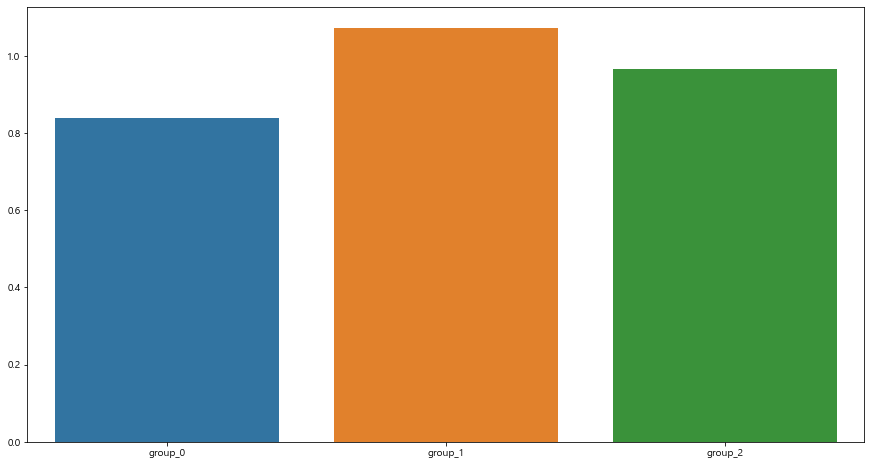

In [46]:
# 시각화를 위해서 각 그룹별 size을 따로 변수로 생성
recom0 = df[df['labels'] == 0]['산책시간(시간)'].mean()
recom1 = df[df['labels'] == 1]['산책시간(시간)'].mean()
recom2 = df[df['labels'] == 2]['산책시간(시간)'].mean()
# 주의 모든 과정을 똑같이 하였어도 kmeans의 기본 중심값 설정은 랜덤임
plt.figure(figsize = (15,8))
sns.barplot(x = ['group_0', 'group_1', 'group_2'], y = [recom0, recom1, recom2] )
plt.show()

## (7)그룹별 특징
- 나이를 기준으로 비교

In [47]:
df.head()

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링,labels
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2,1
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2,1
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2,1
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2,1
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2,1


In [48]:
group = df[(df['labels']==0) | (df['labels']==1) | (df['labels']==2) ]

In [49]:
group['labels'].value_counts()

0    3747
2    1367
1     560
Name: labels, dtype: int64

In [50]:
group = group.groupby('labels').mean().reset_index()
group

,labels,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링
0,0,1.557246,0.838644,3.432247,223.096064,0.614625,0.091006,0.000000
1,1,3.433929,1.073571,23.280625,1513.240625,0.792857,0.069643,1.742857
2,2,2.443307,0.965984,11.956737,777.187930,0.687637,0.086320,0.724214


In [51]:
column = group.columns
column

Index(['labels', '나이', '산책시간(시간)', '체중', '음수량', '성별_라벨링', '중성화_라벨링', '크기_라벨링'], dtype='object')

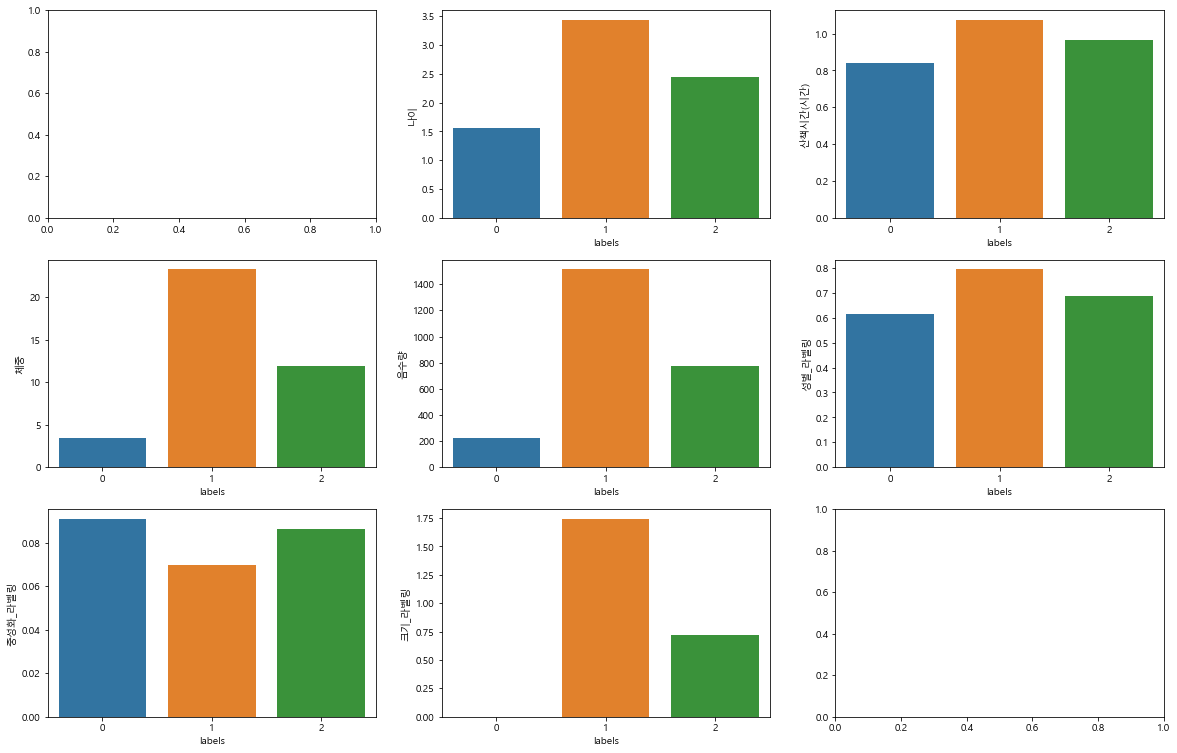

In [59]:
# 반복문으로 그림그리기
f, ax = plt.subplots(3,3,figsize=(20,13))

for i in range(1,8):
        sns.barplot(x='labels', y=column[i], data=group, ax = ax[i//3, i%3])

# sns.barplot(x='labels', y='크기', data = group, ax = ax[0,0])
# sns.barplot(x='labels', y='나이', data = group, ax = ax[0,1])
# sns.barplot(x='labels', y='체중', data = group, ax = ax[1,0])

plt.show()

In [60]:
df[df['labels']==0].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.0,3747.0
mean,1.557246,0.838644,3.432247,223.096064,0.614625,0.091006,0.0,0.0
std,2.778746,0.132095,1.826670,118.733573,0.486749,0.287656,0.0,0.0
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.800000,2.000000,130.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.800000,3.000000,195.000000,1.000000,0.000000,0.0,0.0
75%,2.000000,1.000000,4.800000,312.000000,1.000000,0.000000,0.0,0.0
max,18.000000,1.500000,7.640000,496.600000,1.000000,1.000000,0.0,0.0


In [61]:
df[df['labels']==1].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.0
mean,3.433929,1.073571,23.280625,1513.240625,0.792857,0.069643,1.742857,1.0
std,1.916670,0.231000,5.557124,361.213078,0.405621,0.254772,0.437450,0.0
min,0.000000,0.500000,17.700000,1150.500000,0.000000,0.000000,1.000000,1.0
25%,2.000000,1.000000,19.500000,1267.500000,1.000000,0.000000,1.000000,1.0
50%,3.000000,1.000000,21.000000,1365.000000,1.000000,0.000000,2.000000,1.0
75%,4.250000,1.000000,25.125000,1633.125000,1.000000,0.000000,2.000000,1.0
max,14.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000,1.0


In [62]:
df[df['labels']==2].describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,1367.000000,1367.000000,1367.000000,1367.00000,1367.000000,1367.000000,1367.000000,1367.0
mean,2.443307,0.965984,11.956737,777.18793,0.687637,0.086320,0.724214,2.0
std,1.974834,0.118458,2.879832,187.18911,0.463627,0.280939,0.447073,0.0
min,0.000000,0.500000,7.700000,500.50000,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,9.500000,617.50000,0.000000,0.000000,0.000000,2.0
50%,2.000000,1.000000,12.000000,780.00000,1.000000,0.000000,1.000000,2.0
75%,3.000000,1.000000,15.000000,975.00000,1.000000,0.000000,1.000000,2.0
max,13.000000,1.500000,17.600000,1144.00000,1.000000,1.000000,1.000000,2.0


In [63]:
df.head()

,품종,나이,산책시간(시간),체중,성별,중성화여부,색상,음수량,성별_라벨링,중성화_라벨링,크기,크기_라벨링,labels
0,골든 리트리버,13,0.5,27.0,M,N,갈색,1755.0,1,0,대,2,1
1,골든 리트리버,10,0.5,25.0,F,N,갈색,1625.0,0,0,대,2,1
2,골든 리트리버,9,0.5,40.0,M,N,갈색,2600.0,1,0,대,2,1
3,골든 리트리버,8,0.5,28.0,F,N,갈색,1820.0,0,0,대,2,1
4,골든 리트리버,8,0.5,33.0,M,N,갈색,2145.0,1,0,대,2,1


<AxesSubplot:>

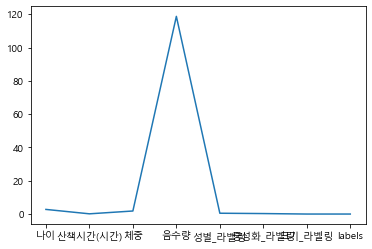

In [70]:
df[df['labels']==0].std().plot()

In [71]:
df.describe()

,나이,산책시간(시간),체중,음수량,성별_라벨링,중성화_라벨링,크기_라벨링,labels
count,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000,5674.000000
mean,1.955939,0.892510,7.444949,483.921678,0.649806,0.087769,0.346493,0.580543
std,2.603371,0.163133,6.894764,448.159680,0.477073,0.282983,0.610848,0.851756
min,0.000000,0.500000,0.040000,2.600000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.800000,2.655000,172.575000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.800000,5.000000,325.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,10.000000,650.000000,1.000000,0.000000,1.000000,1.000000
max,18.000000,1.500000,60.000000,3900.000000,1.000000,1.000000,2.000000,2.000000


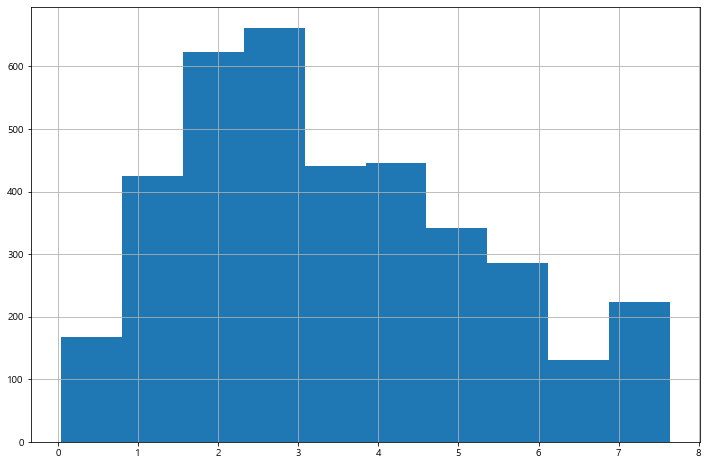

In [72]:
plt.figure(figsize=(12,8))
df[df['labels']==0]['체중'].hist()
plt.show()

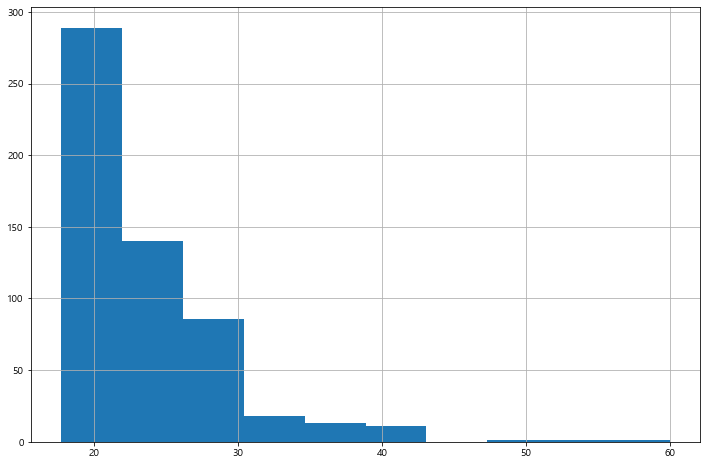

In [73]:
plt.figure(figsize=(12,8))
df[df['labels']==1]['체중'].hist()
plt.show()

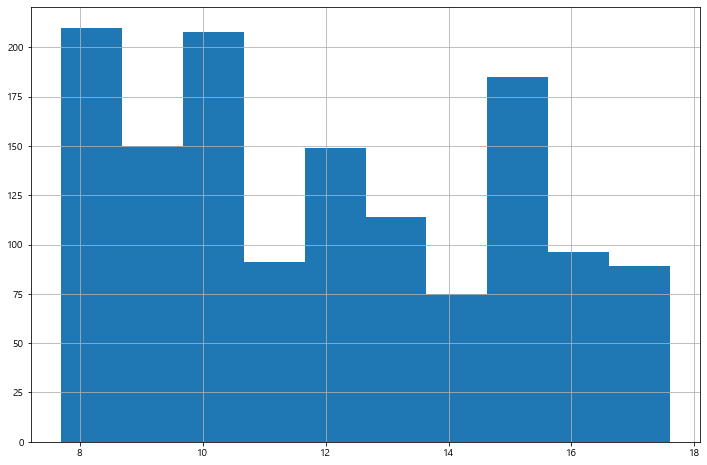

In [74]:
plt.figure(figsize=(12,8))
df[df['labels']==2]['체중'].hist()
plt.show()
